## Initial exploration of the dataset `BerkeleyEarth`

We will start with the initial exploration of the Berkeley Climate Change dataset.

In [103]:
import os
import pandas as pd
import numpy as np
import re
from dyplot.dygraphs import Dygraphs
import matplotlib.pyplot as plt
from matplotlib import interactive

First of all we have 5 files:

In [11]:
DATAPATH="../../Datasets/BerkeleyEarth"
getfsize = lambda f: os.path.getsize(os.path.join(DATAPATH, f))
files = [(f, getfsize(f)) for f in os.listdir(DATAPATH) if os.path.isfile(os.path.join(DATAPATH, f))]
files = sorted(files, key=lambda x: x[1]) # Sort by size
for (f, size) in files:
    print(f"File: {f}, size: {size}")

File: GlobalTemperatures.csv, size: 205875
File: GlobalLandTemperaturesByMajorCity.csv, size: 14138385
File: GlobalLandTemperaturesByCountry.csv, size: 22680393
File: GlobalLandTemperaturesByState.csv, size: 30770160
File: GlobalLandTemperaturesByCity.csv, size: 532830464


The files are sorted from the smallest to the largest. The first file containts the global temperatures, that is presumably temperatures over the whole globe. Let's see them.

In [17]:
filenames = [f[0] for f in files]
global_temperatures=pd.read_csv(os.path.join(DATAPATH, filenames[0]))

In [19]:
global_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


The first column `dt` represents the time when the measurement was taken. 
Interestingly there are some rows, where only `dt` is non-null. Are there any duplicates then? If not, when is it?

In [61]:
global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'], format='%Y-%m-%d')
len(global_temperatures['dt'].unique())

3192

No duplicates.

In [62]:
nullind = global_temperatures.loc[:, global_temperatures.columns != 'dt'].isnull().apply(lambda row: np.all(row), axis=1)
global_temperatures.loc[nullind, 'dt']

10   1750-11-01
16   1751-05-01
18   1751-07-01
21   1751-10-01
22   1751-11-01
23   1751-12-01
25   1752-02-01
28   1752-05-01
29   1752-06-01
30   1752-07-01
31   1752-08-01
32   1752-09-01
Name: dt, dtype: datetime64[ns]

Okay, so it seems all the empty rows are at the early stage of data collection, only years 1750, 1751 and 1752, when probably in some months there were no manual data.

There is also more data for `LandAverageTemperature` and `LandAverageTemperatureUncertainty` than for the other columns. Probably it is also connected with the fact that those were collected in the early stages. Let's see if that's true, and if so, when all the rows start to be nonempty.

In [63]:
anynull_ind = global_temperatures.isnull().apply(lambda x: np.any(x), axis=1)
global_temperatures_nonull = global_temperatures[~anynull_ind]
global_temperatures_nonull.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [64]:
np.unique(np.diff(global_temperatures_nonull.index))

array([1])

It means that there are no 'holes' in the non-null rows somewhere further in the dataset.

### Trend plots

Each columns for a temperature has a corresponding column with 95\% uncertainty bounds. 
Let's see the trend plots with the confidence intervals overlapped onto the plots.
First however let's see without the bounds, with yearly average of the data.

In [78]:
cols = global_temperatures_nonull.columns
nouncertainty_cols = [c for c in cols if not re.search('Uncertainty', c)] 
nouncertainty_gt = global_temperatures[nouncertainty_cols]
nouncertainty_gt['year'] = nouncertainty_gt['dt'].dt.year
nouncertainty_gt['month'] = nouncertainty_gt['dt'].dt.month

/var/folders/n1/qp75l2g925sckph10y4rw6d00000gp/T/ipykernel_81345/2151186336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouncertainty_gt['year'] = nouncertainty_gt['dt'].dt.year
/var/folders/n1/qp75l2g925sckph10y4rw6d00000gp/T/ipykernel_81345/2151186336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouncertainty_gt['month'] = nouncertainty_gt['dt'].dt.month


In [109]:
yearly_avg_gt = nouncertainty_gt.loc[:, nouncertainty_gt.columns != 'month'].groupby('year').mean()
print(yearly_avg_gt.columns)

Index(['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature',
       'LandAndOceanAverageTemperature'],
      dtype='object')


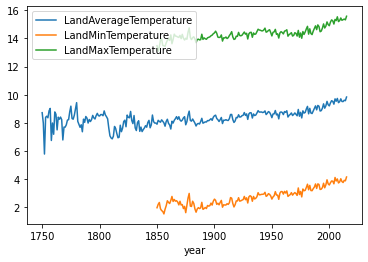

In [131]:
%matplotlib inline
yearly_avg_gt.plot(y=['LandAverageTemperature', 'LandMinTemperature', 'LandMaxTemperature'])
plt.show()

Let's see the monthly temperatures over one year.

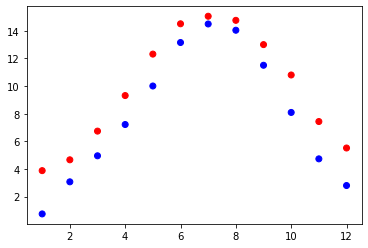

In [158]:
colors = {1850: 'blue', 2015: 'red'}
extentyears = nouncertainty_gt[nouncertainty_gt.year.isin( [1850, 2015]) ]
fig, ax = plt.subplots()
ax.scatter(extentyears['month'], extentyears['LandAverageTemperature'], c=extentyears['year'].map(colors))
plt.show()